## Import Packages

In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

## Load Data

In [2]:
avocados = pd.read_csv("/Users/kenyashiafernandez/Downloads/avocados.csv")

In [3]:
avocados.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Does the total volume of avocados sold differ between Indianapolis, Orlando, and PhoenixTucson?

## Data Wrangling

In [4]:
regions = ["Chicago", "Tulsa", "PhoenixTucson"]

In [6]:
avocados1 = avocados["region"].isin(regions)

In [7]:
avocados2 = avocados[avocados1].copy()

In [8]:
avocados2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
416,0,12/27/2015,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015,Chicago
417,1,12/20/2015,0.91,690669.34,35724.99,464574.15,96306.30,94063.90,76241.25,9592.65,8230.00,conventional,2015,Chicago
418,2,12/13/2015,1.07,668601.50,40380.09,451470.42,94162.53,82588.46,76829.42,5693.75,65.29,conventional,2015,Chicago
419,3,12/6/2015,1.14,664020.49,53173.18,455048.11,92888.37,62910.83,62473.12,420.95,16.76,conventional,2015,Chicago
420,4,11/29/2015,1.11,602481.22,42851.47,422479.32,74988.97,62161.46,61862.57,298.89,0.00,conventional,2015,Chicago


In [9]:
avocados2.region.value_counts()

Chicago          338
PhoenixTucson    338
Name: region, dtype: int64

## Recode Categorical Variables

In [10]:
dict = {'Chicago' : 0, 'Tulsa' : 1, 'PhoenixTucson' : 2}

In [11]:
avocados2['region'] = avocados2.region.replace(dict)

In [12]:
avocados2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
416,0,12/27/2015,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015,0
417,1,12/20/2015,0.91,690669.34,35724.99,464574.15,96306.30,94063.90,76241.25,9592.65,8230.00,conventional,2015,0
418,2,12/13/2015,1.07,668601.50,40380.09,451470.42,94162.53,82588.46,76829.42,5693.75,65.29,conventional,2015,0
419,3,12/6/2015,1.14,664020.49,53173.18,455048.11,92888.37,62910.83,62473.12,420.95,16.76,conventional,2015,0
420,4,11/29/2015,1.11,602481.22,42851.47,422479.32,74988.97,62161.46,61862.57,298.89,0.00,conventional,2015,0


In [13]:
avocados2.region.value_counts()

0    338
2    338
Name: region, dtype: int64

## Assumptions

### Normaility 

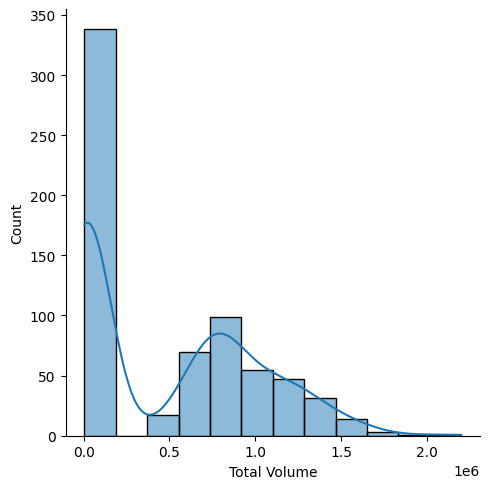

In [15]:
sns.displot(avocados2['Total Volume'], kde = True)

In [16]:
avocados2['TVsqrt'] = np.sqrt(avocados2['Total Volume'])

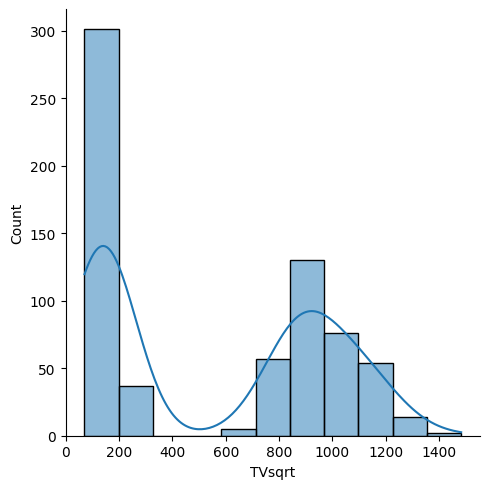

In [17]:
sns.displot(avocados2['TVsqrt'], kde = True)

In [18]:
avocados2['TVlog'] = np.log(avocados2['Total Volume'])

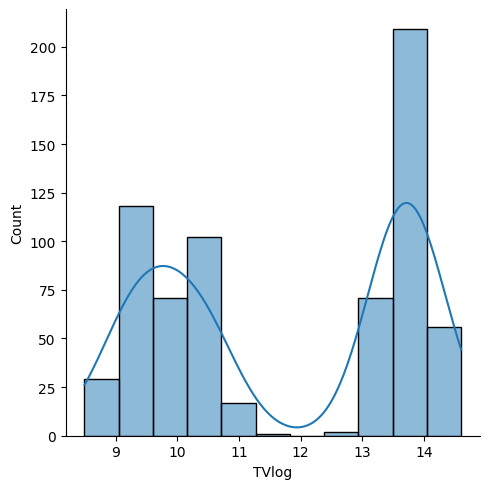

In [20]:
sns.displot(avocados2['TVlog'], kde = True)

## Homogeneity of variance

In [22]:
scipy.stats.bartlett(avocados2["TVlog"], avocados2["region"])

BartlettResult(statistic=305.1918910336536, pvalue=2.43593064589131e-68)

## ANOVA

In [23]:
stats.f_oneway(avocados["Total Volume"][avocados["region"]=='Chicago'],
                    avocados["Total Volume"][avocados["region"]=='Tulsa'],
                    avocados["Total Volume"][avocados["region"]=='PhoenixTucson'])
## appears to be significant difference with that p-value

/opt/homebrew/Cellar/jupyterlab/3.2.9/libexec/lib/python3.9/site-packages/scipy/stats/_stats_py.py:3630: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

In [26]:
postHoc = MultiComparison(avocados2["TVlog"], avocados2["region"])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)
## reject the null hypothesis for all

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper reject
--------------------------------------------------
     0      2  -0.2654 0.0863 -0.5688 0.038  False
--------------------------------------------------


In [27]:
avocados3 = avocados2[['region', 'Total Volume']]

In [28]:
avocados3.groupby("region").mean()

,Total Volume
region,
0,395569.048846
2,578826.368343


## PhoenixTucson has the highest total volume, with Chicago having the least total volume of the three.